# Project 3 for CSE142
## CIFAR-10 Classification

Importing necessary packages:

- tensorflow/keras: API to build and train models
- matplotlib: generate graphs
- numpy: perform array operations
- pandas: to work with dataframes
- pickle: for serializing and de-serializing a Python object
- os: for file paths

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import numpy as np
import pandas as pd
# import pickle
# import os, os.path

### *Initialize relevant variables*

In [2]:
labels_df = pd.read_csv("Semi1_Labels.csv") #change this for different versions
train_path = 'Train_Image' 
test_path = 'Test_Image' 
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
labels_df.head()

,Train Label
0,NAN
1,dog
2,NAN
3,airplane
4,NAN


**Function to load an image**

In [3]:
def get_image(img_number):
    img = mpimg.imread(train_path + f"/{img_number}.png") 
    return img

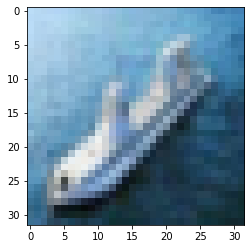

In [4]:
plt.imshow(get_image(7777))

**Function that prints image info**

Also converts and returns png to 1D vector

In [5]:
def get_img_info(img):
    rows,cols,channels = img.shape 
    img_size = rows*cols*channels # channels means rgb colors i think, so should always be 3?
    img_to_1D = img.reshape(img_size) #numPy reshape
    print("rows, cols, channels:", rows, cols, channels)
    print("image size:", img_size)
#     print("image original:", img)
    print("image reshape:", img_to_1D)
    return img_to_1D

In [6]:
print(len(get_img_info(get_image(7777)))) #it works i guess

rows, cols, channels: 32 32 3
image size: 3072
image reshape: [0.73333335 0.8666667  0.96862745 ... 0.07058824 0.15686275 0.19215687]
3072


## Preprocessing the  Data

We need to separate the labeled data from the unlabeled

Also, we probably need to encode the labels as numbers instead of strings

In [7]:
labeled = []
unlabeled = []

In [19]:
col = labels_df.columns
for i, entry in enumerate(labels_df[col[0]]):
    if (entry == 'NAN'):
        unlabeled.append(i)
    else:
        labeled.append((i, entry))
print("labeled", labeled)
print("unlabeled", unlabeled)

labeled [(1, 'dog'), (3, 'airplane'), (8, 'deer'), (18, 'frog'), (26, 'deer'), (27, 'dog'), (29, 'cat'), (30, 'airplane'), (32, 'bird'), (33, 'automobile'), (37, 'cat'), (60, 'automobile'), (73, 'dog'), (75, 'ship'), (77, 'cat'), (83, 'deer'), (85, 'cat'), (91, 'deer'), (98, 'bird'), (99, 'frog'), (105, 'frog'), (110, 'horse'), (114, 'frog'), (118, 'frog'), (129, 'ship'), (151, 'cat'), (154, 'truck'), (158, 'bird'), (163, 'bird'), (164, 'horse'), (165, 'deer'), (167, 'dog'), (171, 'cat'), (176, 'horse'), (184, 'airplane'), (190, 'dog'), (194, 'truck'), (197, 'airplane'), (205, 'cat'), (216, 'frog'), (222, 'ship'), (227, 'horse'), (231, 'horse'), (238, 'truck'), (243, 'truck'), (246, 'airplane'), (248, 'truck'), (249, 'truck'), (251, 'cat'), (252, 'horse'), (260, 'frog'), (267, 'frog'), (268, 'deer'), (283, 'automobile'), (286, 'dog'), (287, 'dog'), (289, 'cat'), (290, 'horse'), (297, 'frog'), (302, 'automobile'), (308, 'deer'), (318, 'ship'), (320, 'dog'), (324, 'bird'), (326, 'airplan